In [1]:
import random

from deap import base, creator, tools

# Evaluation function
def eval_func(individual):
    target_sum = 45
    return len(individual) - abs(sum(individual) - target_sum),

# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Initialize the toolbox
    toolbox = base.Toolbox()

    # Generate attributes 
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Initialize structures
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
        toolbox.attr_bool, num_bits)

    # Define the population to be a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register the evaluation operator 
    toolbox.register("evaluate", eval_func)

    # Register the crossover operator
    toolbox.register("mate", tools.cxTwoPoint)

    # Register a mutation operator
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

    # Operator for selecting individuals for breeding
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

if __name__ == "__main__":
    # Define the number of bits
    num_bits = 75

    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)

    # Seed the random number generator
    random.seed(7)

    # Create an initial population of 500 individuals
    population = toolbox.population(n=500)

    # Define probabilities of crossing and mutating
    probab_crossing, probab_mutating  = 0.5, 0.2

    # Define the number of generations
    num_generations = 60
    
    print('\nStarting the evolution process')
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    
    print('\nEvaluated', len(population), 'individuals')
    
    # Iterate through generations
    for g in range(num_generations):
        print("\n===== Generation", g)
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if random.random() < probab_crossing:
                toolbox.mate(child1, child2)

                # "Forget" the fitness values of the children
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            # Mutate an individual
            if random.random() < probab_mutating:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print('Evaluated', len(invalid_ind), 'individuals')
        
        # The population is entirely replaced by the offspring
        population[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in population]
        
        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print('Min =', min(fits), ', Max =', max(fits))
        print('Average =', round(mean, 2), ', Standard deviation =', 
                round(std, 2))
    
    print("\n==== End of evolution")
    
    best_ind = tools.selBest(population, 1)[0]
    print('\nBest individual:\n', best_ind)
    print('\nNumber of ones:', sum(best_ind))


Starting the evolution process

Evaluated 500 individuals

===== Generation 0
Evaluated 297 individuals
Min = 58.0 , Max = 75.0
Average = 70.43 , Standard deviation = 2.91

===== Generation 1
Evaluated 303 individuals
Min = 63.0 , Max = 75.0
Average = 72.44 , Standard deviation = 2.16

===== Generation 2
Evaluated 310 individuals
Min = 65.0 , Max = 75.0
Average = 73.31 , Standard deviation = 1.6

===== Generation 3
Evaluated 273 individuals
Min = 67.0 , Max = 75.0
Average = 73.76 , Standard deviation = 1.41

===== Generation 4
Evaluated 309 individuals
Min = 68.0 , Max = 75.0
Average = 73.87 , Standard deviation = 1.35

===== Generation 5
Evaluated 312 individuals
Min = 68.0 , Max = 75.0
Average = 73.83 , Standard deviation = 1.36

===== Generation 6
Evaluated 308 individuals
Min = 67.0 , Max = 75.0
Average = 73.76 , Standard deviation = 1.5

===== Generation 7
Evaluated 314 individuals
Min = 67.0 , Max = 75.0
Average = 73.85 , Standard deviation = 1.39

===== Generation 8
Evaluated 3

/home/zog/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	evals	std   	min    	avg    	max    
0  	200  	188.36	217.082	576.281	1199.71
1  	200  	250.543	196.583	659.389	1869.02
2  	200  	273.081	199.455	683.641	1770.65
3  	200  	215.326	111.298	503.933	1579.3 
4  	200  	133.046	149.47 	373.124	790.899
5  	200  	75.4405	131.117	274.092	585.433
6  	200  	61.2622	91.7121	232.624	426.666
7  	200  	49.8303	88.8185	201.117	373.543
8  	200  	39.9533	85.0531	178.645	326.209
9  	200  	31.3781	87.4824	159.211	261.132
10 	200  	31.3488	54.0743	144.561	274.877
11 	200  	30.8796	63.6032	136.791	240.739
12 	200  	24.1975	70.4913	125.691	190.684
13 	200  	21.2274	50.6409	122.293	177.483
14 	200  	25.4931	67.9873	124.132	199.296
15 	200  	26.9804	46.3411	119.295	205.331
16 	200  	24.8993	56.0033	115.614	176.702
17 	200  	21.9789	61.4999	113.417	170.156
18 	200  	21.2823	50.2455	112.419	190.677
19 	200  	22.5016	48.153 	111.543	166.2  
20 	200  	21.1602	32.1864	106.044	171.899
21 	200  	23.3864	52.8601	107.301	163.617
22 	200  	23.1008	51.1226	109.628	18

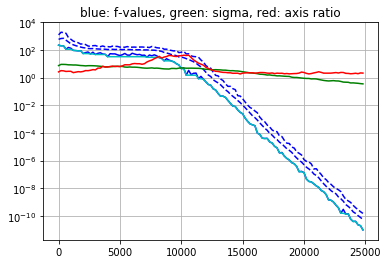

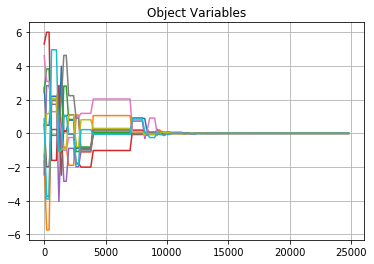

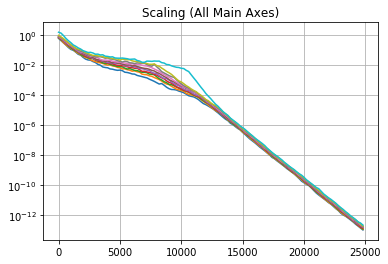

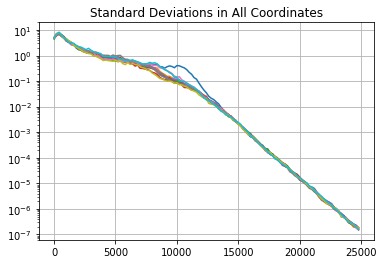

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

%matplotlib inline

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 125

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0, 
            lambda_=20*num_individuals)

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Update the strategy with the evaluated individuals
        toolbox.update(population)
        
        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)
        
        print(logbook.stream)
        
        # Save more data along the evolution 
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, strategy.lambda_ * num_generations, strategy.lambda_))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.semilogy(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")
    
    plt.show()

In [3]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator 

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(x) - (2 * x**3 - 3 * x**2 + 4 * x - 1))**2 for x in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10,10)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.2
    num_generations = 60

    population, log = algorithms.eaSimple(population, toolbox, 
            probab_crossover, probab_mutate, num_generations, 
            stats=mstats, halloffame=hall_of_fame, verbose=True)

/home/zog/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/zog/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


   	      	            fitness            	              size             
   	      	-------------------------------	-------------------------------
gen	nevals	avg    	max    	min    	std    	avg    	max	min	std    
0  	450   	18.6918	47.1923	7.39087	6.27543	3.73556	7  	2  	1.62449
1  	251   	15.4572	41.3823	4.46965	4.54993	3.80222	12 	1  	1.81316
2  	236   	13.2545	37.7223	4.46965	4.06145	3.96889	12 	1  	1.98861
3  	251   	12.2299	60.828 	4.46965	4.70055	4.19556	12 	1  	1.9971 
4  	235   	11.001 	47.1923	4.46965	4.48841	4.84222	13 	1  	2.17245
5  	229   	9.44483	31.478 	4.46965	3.8796 	5.56   	19 	1  	2.43168
6  	225   	8.35975	22.0546	3.02133	3.40547	6.38889	15 	1  	2.40875
7  	237   	7.99309	31.1356	1.81133	4.08463	7.14667	16 	1  	2.57782
8  	224   	7.42611	359.418	1.17558	17.0167	8.33333	19 	1  	3.11127
9  	237   	5.70308	24.1921	1.17558	3.71991	9.64444	23 	1  	3.31365
10 	254   	5.27991	30.4315	1.13301	4.13556	10.5089	25 	1  	3.51898
11 	223   	4.26809	18.7774	0.841562	3.16748	11

In [4]:
import copy
import random
from functools import partial

import numpy as np
from deap import algorithms, base, creator, tools, gp

class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.consumed = 0
        self.routine = None

        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1, 0, -1, 0]
        self.direction_col = [0, 1, 0, -1]
    
    def _reset(self):
        self.row = self.row_start 
        self.col = self.col_start 
        self.direction = 1
        self.moves = 0  
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)

    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()

    def turn_left(self): 
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1    
            self.direction = (self.direction + 1) % 4
        
    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.direction_row[self.direction]) % self.matrix_row
            self.col = (self.col + self.direction_col[self.direction]) % self.matrix_col

            if self.matrix_exc[self.row][self.col] == "target":
                self.consumed += 1

            self.matrix_exc[self.row][self.col] = "passed"

    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col        
        return self.matrix_exc[ahead_row][ahead_col] == "target"
   
    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)
   
    def run(self,routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()
    
    def traverse_map(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())

            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("target")

                elif col == ".":
                    self.matrix[-1].append("empty")

                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.direction = 1

        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2): 
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):     
        return partial(self._progn, out1, out2, out3)

def eval_func(individual):
    global robot, pset

    # Transform the tree expression to functionnal Python code
    routine = gp.compile(individual, pset)

    # Run the generated routine
    robot.run(routine)
    return robot.consumed,

def create_toolbox():
    global robot, pset

    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(robot.if_target_ahead, 2)
    pset.addPrimitive(Prog().prog2, 2)
    pset.addPrimitive(Prog().prog3, 3)
    pset.addTerminal(robot.move_forward)
    pset.addTerminal(robot.turn_left)
    pset.addTerminal(robot.turn_right)

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    # Attribute generator
    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)

    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=7)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    return toolbox

if __name__ == "__main__":
    global robot

    # Seed the random number generator
    random.seed(7)

    # Define the maximum number of moves
    max_moves = 750

    # Create the robot object
    robot = RobotController(max_moves)

    # Create the toolbox
    toolbox = create_toolbox()
    
    # Read the map data
    with open('target_map.txt', 'r') as f:
      robot.traverse_map(f)
    
    # Define population and hall of fame variables
    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)

    # Register the stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.3
    num_generations = 50
    
    # Run the algorithm to solve the problem
    algorithms.eaSimple(population, toolbox, probab_crossover, 
            probab_mutate, num_generations, stats, 
            halloffame=hall_of_fame)

/home/zog/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/zog/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg   	std    	min	max
0  	400   	1.4875	4.37491	0  	62 
1  	231   	4.285 	7.56993	0  	73 
2  	235   	10.8925	14.8493	0  	73 
3  	231   	21.72  	22.1239	0  	73 
4  	238   	29.9775	27.7861	0  	76 
5  	224   	37.6275	31.8698	0  	76 
6  	231   	42.845 	33.0541	0  	80 
7  	223   	43.55  	33.9369	0  	83 
8  	234   	44.0675	34.5201	0  	83 
9  	231   	49.2975	34.3065	0  	83 
10 	249   	47.075 	36.4106	0  	93 
11 	222   	52.7925	36.2826	0  	97 
12 	248   	51.0725	37.2598	0  	97 
13 	234   	54.01  	37.4614	0  	97 
14 	229   	59.615 	37.7894	0  	97 
15 	228   	63.3   	39.8205	0  	97 
16 	220   	64.605 	40.3962	0  	97 
17 	236   	62.545 	40.5607	0  	97 
18 	233   	67.99  	38.9033	0  	97 
19 	236   	66.4025	39.6574	0  	97 
20 	221   	69.785 	38.7117	0  	97 
21 	244   	65.705 	39.0957	0  	97 
22 	230   	70.32  	37.1206	0  	97 
23 	241   	67.3825	39.4028	0  	97 
24 	227   	69.265 	38.8828	0  	97 
25 	230   	68.9875	38.2422	0  	97 
26 	214   	71.505 	36.964 	0  	97 
27 	246   	72.72  	37.1